# HR Employee Attrition Capstone Project


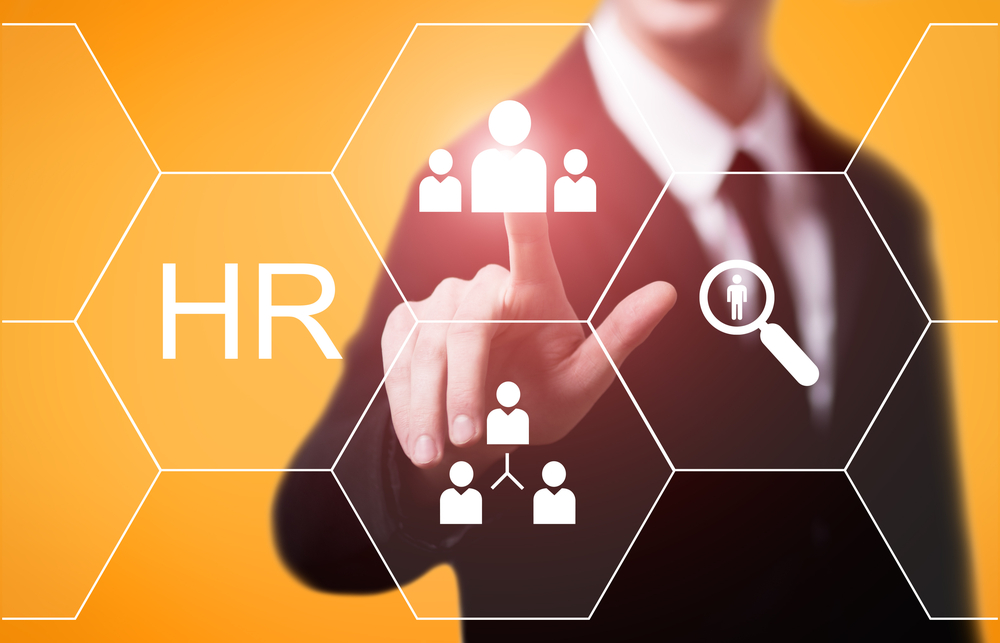

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data reading

In [2]:
Hr_data= pd.read_csv(r"C:\Users\Arvind Vasa\AI&ML\stats and ML\Capstone Project\HR_Employee_Attrition_Data.csv")
Hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
Hr_data.shape

(2940, 35)

In [4]:
Hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
Hr_data.describe().loc[['mean','50%'],:]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,36.92381,802.485714,9.192517,2.912925,1.0,1470.5,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.79932,2.761224,7.008163,4.229252,2.187755,4.123129
50%,36.00000,802.000000,7.000000,3.000000,1.0,1470.5,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.00000,3.000000,5.000000,3.000000,1.000000,3.000000


## Data Preprocessing

### Null value check

In [6]:
null_data= Hr_data.isnull().sum()
cnt=0
for i,j in null_data.items():
    if j>0:
        cnt+=1
print("No of columns having missing data", cnt)

No of columns having missing data 0


### Zero variance check

In [7]:
cnt=0
for feat in Hr_data.select_dtypes(['int','float']):
    if Hr_data[feat].var()==0:
        print(feat)
        cnt+=1
print("No of columns having Zero Variance :", cnt)

EmployeeCount
StandardHours
No of columns having Zero Variance : 2


In [8]:
print("No of unique values in 'EmployeeCount' column :", Hr_data['EmployeeCount'].nunique())
print("No of unique values in 'StandardHours' column :", Hr_data['StandardHours'].nunique())

No of unique values in 'EmployeeCount' column : 1
No of unique values in 'StandardHours' column : 1


#### It was found that the columns EmployeeCount. Employee Number and StandardHours has no contribution in predicting target variable

In [9]:
Hr_data.drop(['EmployeeCount','StandardHours'], axis=1, inplace=True)

In [10]:
Hr_data.drop('EmployeeNumber', axis=1, inplace= True)

In [11]:
Hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [16]:
outlier_containing_features= []
for feature in Hr_data.select_dtypes(['int', 'float']).drop('PerformanceRating', axis= 1):
    Q1= Hr_data[feature].quantile(0.25)
    Q3= Hr_data[feature].quantile(0.75)
    IQR= Q3-Q1
    outlier_count= (Hr_data[feature]>Q3+(1.5*IQR)).sum() + (Hr_data[feature]<Q1-(1.5*IQR)).sum()
    outlier_percentage= outlier_count/Hr_data[feature].count()
    if outlier_count > 0:
        outlier_containing_feature
        s.append(feature)
        print(feature,'\nOutlier count : ', outlier_count,'\nOutlier percentage:',f"{ outlier_percentage*100: .2f}%",'\n')

MonthlyIncome 
Outlier count :  228 
Outlier percentage:  7.76% 

NumCompaniesWorked 
Outlier count :  104 
Outlier percentage:  3.54% 

StockOptionLevel 
Outlier count :  170 
Outlier percentage:  5.78% 

TotalWorkingYears 
Outlier count :  126 
Outlier percentage:  4.29% 

TrainingTimesLastYear 
Outlier count :  476 
Outlier percentage:  16.19% 

YearsAtCompany 
Outlier count :  208 
Outlier percentage:  7.07% 

YearsInCurrentRole 
Outlier count :  42 
Outlier percentage:  1.43% 

YearsSinceLastPromotion 
Outlier count :  214 
Outlier percentage:  7.28% 

YearsWithCurrManager 
Outlier count :  28 
Outlier percentage:  0.95% 



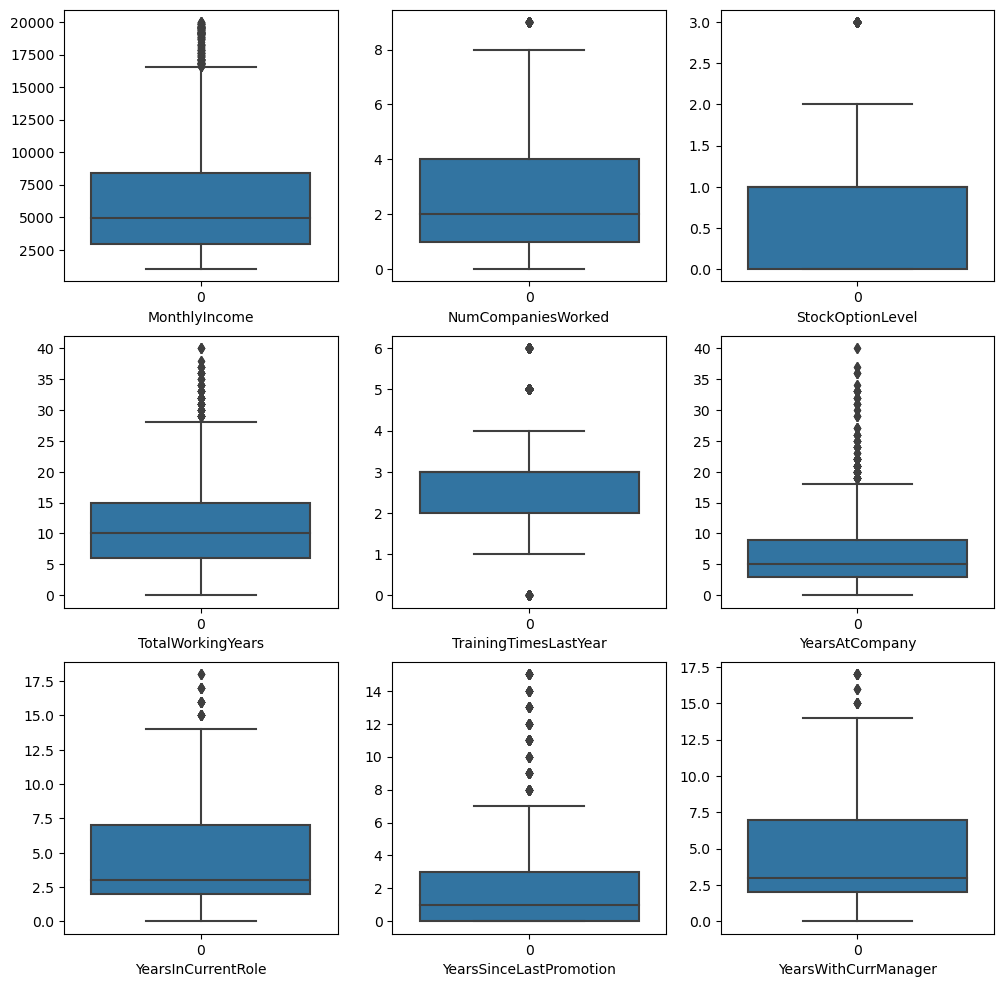

In [17]:
plt.figure(figsize= (12,12))
plt.subplots_adjust()
for i,feature in enumerate(outlier_containing_features):
    plt.subplot(3,3,i+1)
    plt.xlabel(feature)
    sns.boxplot(Hr_data[feature])

In [18]:
outlier_containing_features

['MonthlyIncome',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

#### Outlier Data seems to be legitamite, no transformation being applied

### Label encoding

#### not going with one hot encoding, to avoid increased dimensionality

In [19]:
Le= LabelEncoder()
Hr_labeled_data= Hr_data.copy()
for cat_feat in Hr_data.select_dtypes('object'):
    Hr_labeled_data[cat_feat]= Le.fit_transform(Hr_labeled_data[cat_feat])
Hr_labeled_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


### Train Test split

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [21]:
X= Hr_labeled_data.drop('Attrition', axis=1)
y= Hr_labeled_data['Attrition']

In [26]:
X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.2, random_state = 42)

## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
import time


In [79]:
RF= RandomForestClassifier()

In [47]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [15,16,17,18, 14],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini'],
             }

cv_rf = GridSearchCV(RF, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 5}
Time taken in grid search:  8.73


In [80]:
RF.set_params(max_depth=15,
              max_features= 'sqrt',
              criterion='gini')

RandomForestClassifier(max_depth=15)

### OBB rate

In [81]:
RF.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    RF.set_params(n_estimators=i)
    RF.fit(X_train, y_train)

    oob_error = 1 - RF.oob_score_
    error_rate[i] = oob_error

In [82]:
mini= 100
n_est=0
for i in error_rate.keys():
    if error_rate[i] < mini:
        n_est=i
        mini= error_rate[i]
print(n_est, mini)

447 0.0267857142857143


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

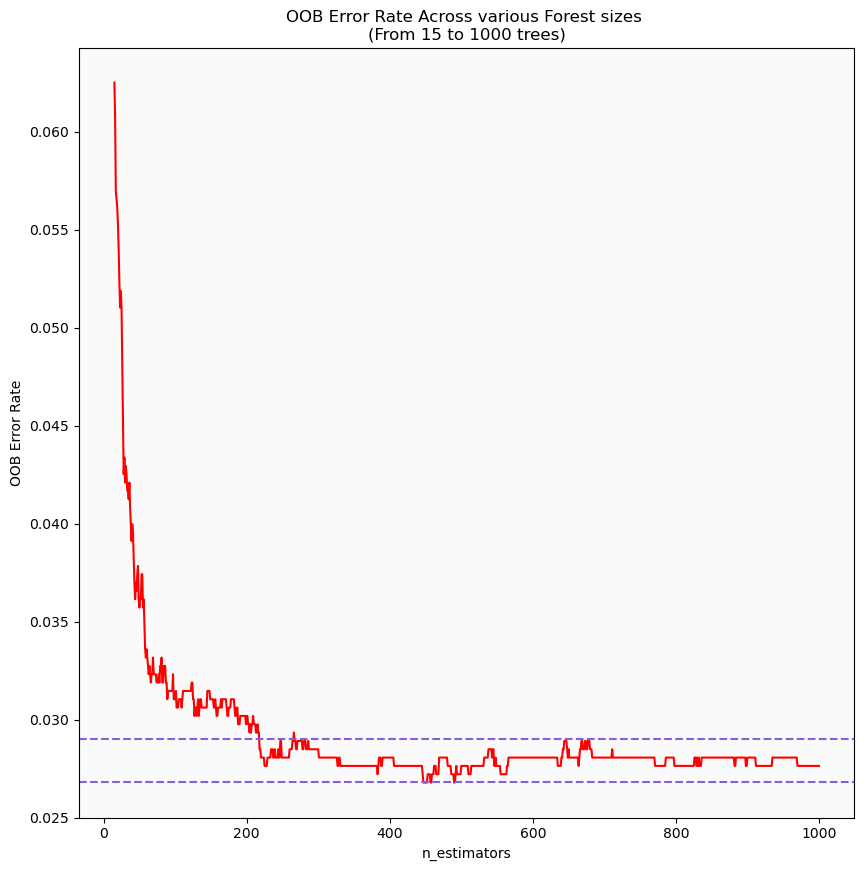

In [162]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')

plt.axhline(0.0268, color='#875FDB',linestyle='--')
plt.axhline(0.029, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [91]:
print('OOB Error rate for 447 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 447 trees is: 0.02806


In [93]:
# Refine the tree via OOB Output
RF.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=15, n_estimators=400)

In [94]:
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=400)

In [95]:
RF.score(X_test, y_test)

0.9693877551020408

In [96]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [120]:
var_imp_rf = variable_importance(RF)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [121]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [122]:
names_index= Hr_labeled_data.drop('Attrition', axis=1).columns

In [123]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'MonthlyIncome' has a Mean Decrease in Impurity of 0.08203
2. The feature 'Age' has a Mean Decrease in Impurity of 0.05889
3. The feature 'OverTime' has a Mean Decrease in Impurity of 0.05702
4. The feature 'DailyRate' has a Mean Decrease in Impurity of 0.05644
5. The feature 'TotalWorkingYears' has a Mean Decrease in Impurity of 0.05289
6. The feature 'MonthlyRate' has a Mean Decrease in Impurity of 0.05233
7. The feature 'DistanceFromHome' has a Mean Decrease in Impurity of 0.05096
8. The feature 'HourlyRate' has a Mean Decrease in Impurity of 0.05063
9. The feature 'YearsAtCompany' has a Mean Decrease in Impurity of 0.04015
10. The feature 'NumCompaniesWorked' has a Mean Decrease in Impurity of 0.03642
11. The feature 'PercentSalaryHike' has a Mean Decrease in Impurity of 0.03533
12. The feature 'YearsWithCurrManager' has a Mean Decrease in Impurity of 0.03155
13. The feature 'EnvironmentSatisfaction' has a Mean Decrease in Impurity of 0.03142
14. The

In [124]:
predictions_rf = RF.predict(X_test)

## Model evaluation

In [128]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### confusion matrix

In [131]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

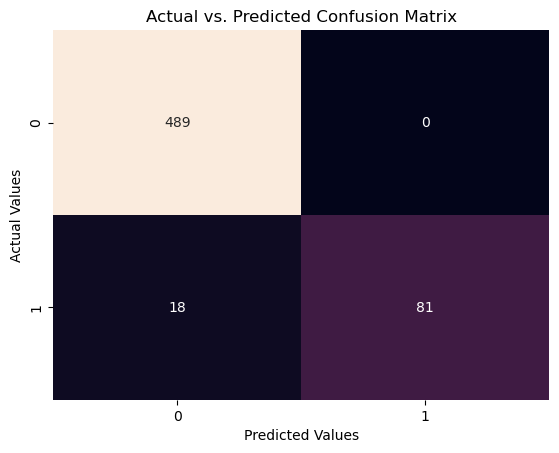

In [132]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

###    accuracy

In [137]:
accuracy_rf = RF.score(X_test, y_test)
 
print("Here is our mean accuracy on the test set: {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set: 0.969


In [139]:
error_rate_rf= 1- accuracy_rf
print("The test error rate for our model is: {0: .4f}"\
      .format(error_rate_rf))

The test error rate for our model is:  0.0306


### area under the curve

In [143]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = RF.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [144]:
auc_rf = auc(fpr2, tpr2)

In [145]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

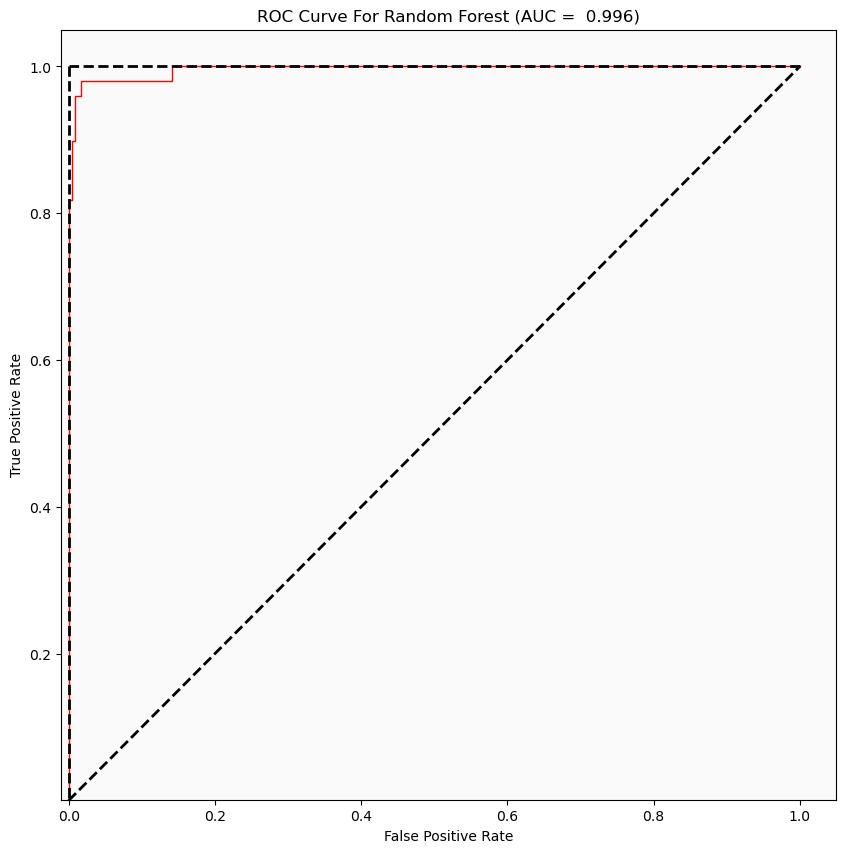

In [146]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

### Classification report

In [157]:
dx=['no','yes']

In [158]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test, 
            target_names = dx))

In [159]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

          no       1.00      0.96      0.98       507
         yes       0.82      1.00      0.90        81

    accuracy                           0.97       588
   macro avg       0.91      0.98      0.94       588
weighted avg       0.97      0.97      0.97       588

